# Gaming Analytics - Data Exploration
## Phase 2: Initial Data Quality Assessment

This notebook explores the synthetic gaming data and identifies data quality issues.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [2]:
# Load datasets
players_df = pd.read_csv('/workspace/data/raw/player_demographics.csv')
events_df = pd.read_csv('/workspace/data/raw/player_events.csv')
purchases_df = pd.read_csv('/workspace/data/raw/purchases.csv')

print(f"Players: {len(players_df):,} records")
print(f"Events: {len(events_df):,} records")
print(f"Purchases: {len(purchases_df):,} records")

Players: 1,000 records
Events: 51,000 records
Purchases: 5,000 records


## 2. Player Demographics Analysis

In [3]:
# Basic info
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   player_id           1000 non-null   object
 1   registration_date   1000 non-null   object
 2   country             950 non-null    object
 3   age_group           1000 non-null   object
 4   gender              1000 non-null   object
 5   preferred_platform  1000 non-null   object
 6   account_status      1000 non-null   object
 7   last_login          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [4]:
# First few records
players_df.head()

,player_id,registration_date,country,age_group,gender,preferred_platform,account_status,last_login
0,7f91e58f-fb70-40e7-8f4a-c34364c38b02,2024-06-02,TR,13-17,O,iOS,active,2024-06-05 18:38:20.316937
1,71de6ad3-a01e-4f65-b67b-e16fc9d27f92,2024-02-01,DE,18-24,M,Web,banned,2024-04-01 22:28:36.322864
2,6edb8bc9-2293-4c0b-ae53-4d6daa3d9d89,2024-07-04,TR,45+,Unknown,iOS,active,2024-09-22 12:39:13.449888
3,9f09b0fa-599e-4da5-81d0-d4df30d1d9bd,2024-08-25,NaN,13-17,F,iOS,active,2024-08-30 19:47:51.514325
4,b271f424-62cc-4eb9-83cd-9c0c9b03c060,2024-03-21,US,45+,F,Web,active,2024-03-27 16:11:23.466117


In [5]:
# Check for missing values
print("Missing Values:")
print(players_df.isnull().sum())
print(f"\nMissing country percentage: {players_df['country'].isnull().sum() / len(players_df) * 100:.2f}%")

Missing Values:
player_id              0
registration_date      0
country               50
age_group              0
gender                 0
preferred_platform     0
account_status         0
last_login             0
dtype: int64

Missing country percentage: 5.00%


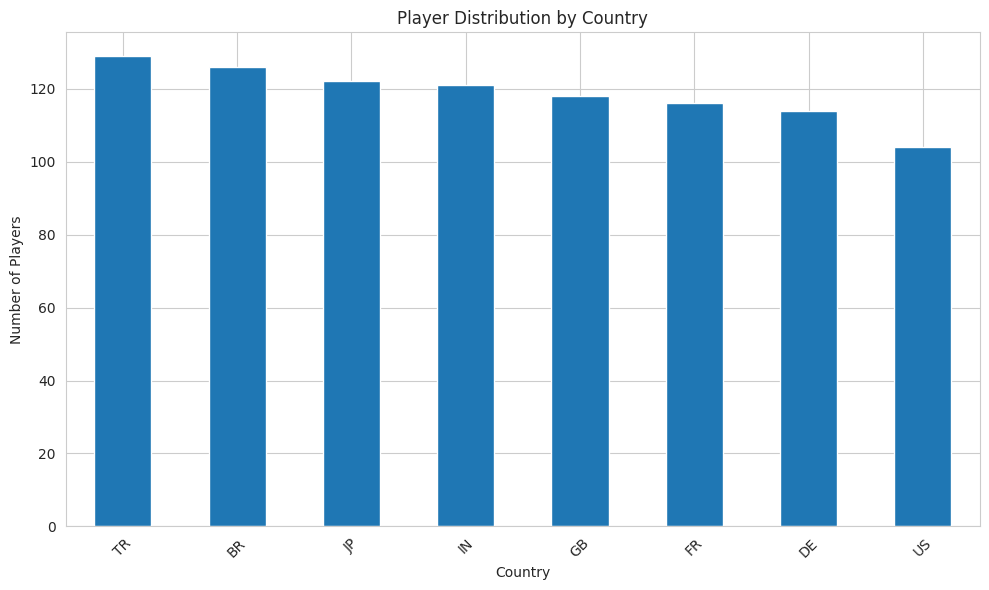

In [6]:
# Distribution by country
plt.figure(figsize=(10, 6))
players_df['country'].value_counts().plot(kind='bar')
plt.title('Player Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Player Events Analysis

In [7]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_id         51000 non-null  object 
 1   player_id        50490 non-null  object 
 2   event_type       51000 non-null  object 
 3   event_timestamp  51000 non-null  object 
 4   game_version     51000 non-null  object 
 5   platform         51000 non-null  object 
 6   country          51000 non-null  object 
 7   session_id       51000 non-null  object 
 8   level_id         16887 non-null  float64
 9   achievement_id   8541 non-null   float64
dtypes: float64(2), object(8)
memory usage: 3.9+ MB


In [8]:
# Check for duplicates
duplicate_count = events_df.duplicated(subset=['event_id']).sum()
print(f"Duplicate events: {duplicate_count:,}")
print(f"Duplicate percentage: {duplicate_count / len(events_df) * 100:.2f}%")

Duplicate events: 1,000
Duplicate percentage: 1.96%


In [9]:
# Missing values
print("Missing Values:")
print(events_df.isnull().sum())

Missing Values:
event_id               0
player_id            510
event_type             0
event_timestamp        0
game_version           0
platform               0
country                0
session_id             0
level_id           34113
achievement_id     42459
dtype: int64


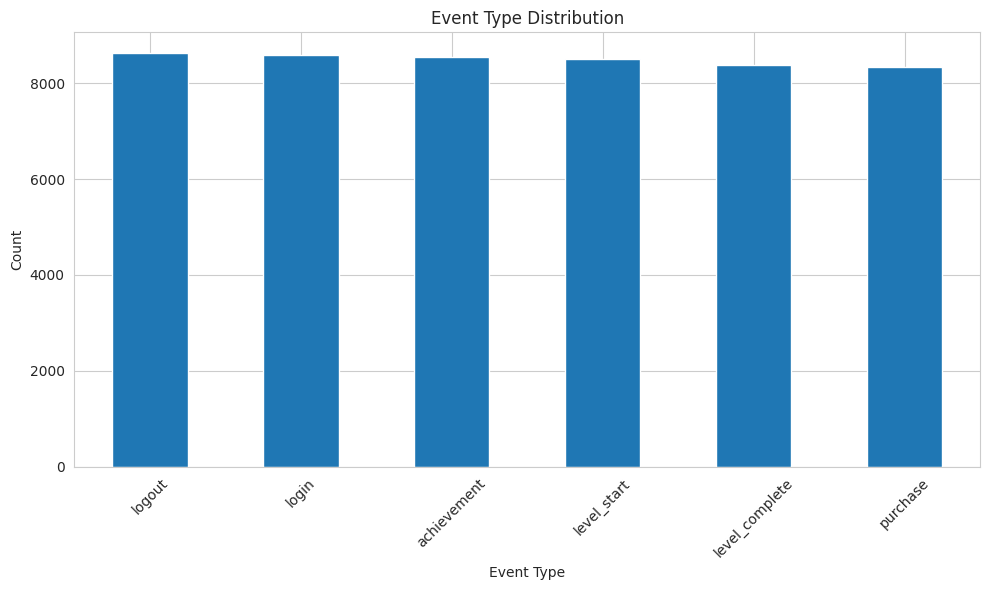

In [10]:
# Event type distribution
plt.figure(figsize=(10, 6))
events_df['event_type'].value_counts().plot(kind='bar')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Check for future timestamps
events_df['event_timestamp'] = pd.to_datetime(events_df['event_timestamp'])
current_date = pd.Timestamp('2024-10-31')
future_events = events_df[events_df['event_timestamp'] > current_date]
print(f"Future events: {len(future_events):,}")
print(f"Future events percentage: {len(future_events) / len(events_df) * 100:.2f}%")

Future events: 255
Future events percentage: 0.50%


## 4. Purchase Analysis

In [12]:
purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      5000 non-null   object 
 1   player_id           5000 non-null   object 
 2   purchase_timestamp  5000 non-null   object 
 3   product_id          5000 non-null   object 
 4   product_name        5000 non-null   object 
 5   product_category    5000 non-null   object 
 6   amount              5000 non-null   float64
 7   currency            5000 non-null   object 
 8   payment_method      5000 non-null   object 
 9   platform            5000 non-null   object 
 10  country             5000 non-null   object 
 11  session_id          5000 non-null   object 
dtypes: float64(1), object(11)
memory usage: 468.9+ KB


In [13]:
# Check for negative amounts
negative_purchases = purchases_df[purchases_df['amount'] < 0]
print(f"Negative purchases: {len(negative_purchases):,}")
print(f"Negative purchases percentage: {len(negative_purchases) / len(purchases_df) * 100:.2f}%")

Negative purchases: 25
Negative purchases percentage: 0.50%


In [14]:
# Revenue statistics
print("Purchase Amount Statistics:")
print(purchases_df['amount'].describe())

Purchase Amount Statistics:
count    5000.000000
mean       50.317440
std        29.395482
min       -94.430000
25%        25.805000
50%        50.810000
75%        75.270000
max        99.990000
Name: amount, dtype: float64


In [15]:
# Revenue by product category
revenue_by_category = purchases_df[purchases_df['amount'] > 0].groupby('product_category')['amount'].agg(['sum', 'mean', 'count'])
revenue_by_category.columns = ['Total Revenue', 'Avg Purchase', 'Count']
print(revenue_by_category)

                  Total Revenue  Avg Purchase  Count
product_category                                    
cosmetic               83601.63     51.195119   1633
currency               81521.22     50.823703   1604
powerup                87763.61     50.496899   1738


In [16]:
# Check for orphaned player_ids
valid_player_ids = set(players_df['player_id'])
purchase_player_ids = set(purchases_df['player_id'])
orphaned_ids = purchase_player_ids - valid_player_ids
orphaned_purchases = purchases_df[purchases_df['player_id'].isin(orphaned_ids)]
print(f"Orphaned purchases (no matching player): {len(orphaned_purchases):,}")
print(f"Orphaned percentage: {len(orphaned_purchases) / len(purchases_df) * 100:.2f}%")

Orphaned purchases (no matching player): 100
Orphaned percentage: 2.00%


## 5. Data Quality Summary

### Issues Identified:
1. **Missing Values**: ~5% of players have missing country
2. **Duplicates**: ~2% duplicate events
3. **Missing player_id**: ~1% of events
4. **Future Timestamps**: ~0.5% of events
5. **Negative Amounts**: ~0.5% of purchases
6. **Orphaned Records**: ~2% purchases without matching player

These issues will be handled in DBT transformations.